In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import warnings
import itertools
import helpers as hp

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
[x for x in enumerate(pd.read_csv("../Data/civic_survey.csv").columns)]

[(0, 'id'),
 (1, 'timestamp'),
 (2, '3 - Area of interest'),
 (3, '4 - Communities of interest'),
 (4, '5 - Destinations'),
 (5, '6 - Corridor preference'),
 (6, '7 - Pittsburgh areas'),
 (7, '8 - Allegheny County areas'),
 (8, '9 - PAAC Routes Used'),
 (9, '10 - Routing Type Preference'),
 (10, '11 - Current Transit Frequency'),
 (11, '11 - Current Transit Usage'),
 (12, '12 - Other Transport Used'),
 (13, '12 - Why Other Transport Used'),
 (14, '13 - Age'),
 (15, '13 - Employment status'),
 (16, '13 - Where From'),
 (17, '14 - Gender'),
 (18, '14 - Race'),
 (19, '15 - Comments')]

In [3]:
data = hp.firstNormal(pd.read_csv("../Data/civic_survey.csv",
                     encoding = "ISO-8859-1", usecols=[0, 2, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18]))
data.columns

Index(['id', 'Area_of_interest', 'Corridor_preference',
       'Current_Transit_Frequency', 'Current_Transit_Usage',
       'Other_Transport_Used', 'Why_Other_Transport_Used', 'Age',
       'Employment_status', 'Where_From', 'Gender', 'Race'],
      dtype='object')

In [4]:
id_ind = 0
AoI_ind = 1
cor_ind = 2
transit_freq_ind = 3
transit_usage_ind = 4
other_transit_ind = 5
barr_ind = 6
age_ind = 7
emp_ind = 8
origin_ind = 9
gender_ind = 10
race_ind = 11

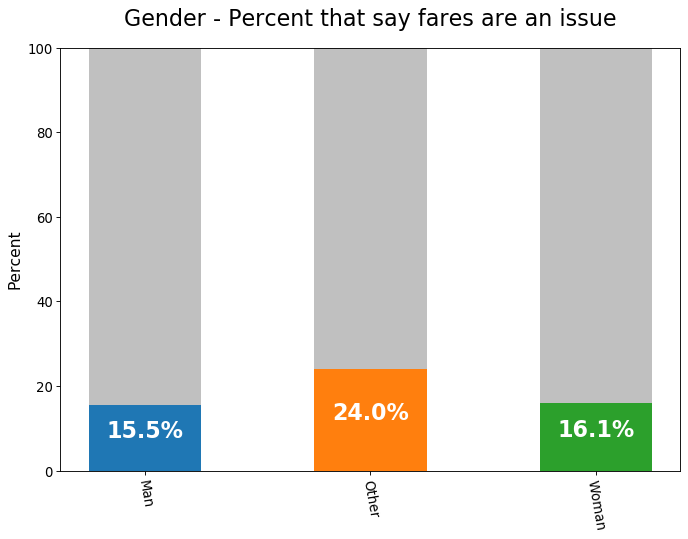

In [6]:
barr_gender = hp.demo_frequencies(hp.aggregate_other(data, col_inds=[gender_ind], threshold=0.1), 
                                  id_index=id_ind, cat_name="Gender_o", val_index=barr_ind)

hp.graph_freqs(barr_gender, val_name = "Why_Other_Transport_Used",
                      val_inst = "Too expensive",
                      cat_name = "Gender_o",
                      share_name="Share",
                      title="Gender - Percent that say fares are an issue")

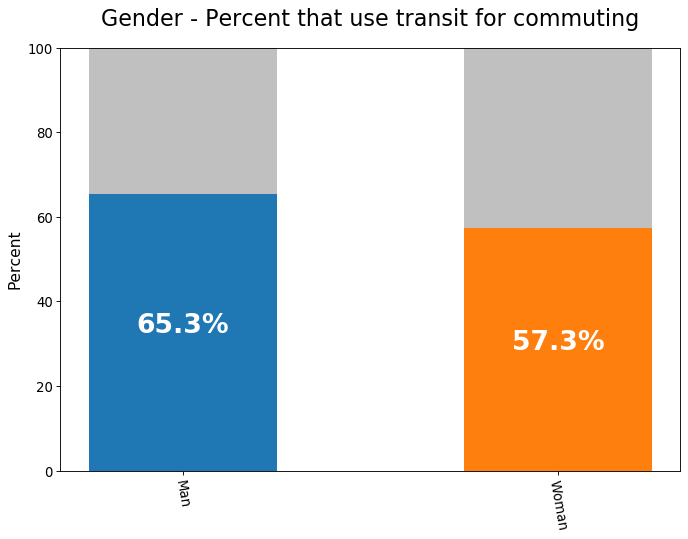

In [10]:
usage_gender = hp.demo_frequencies(hp.aggregate_other(data, col_inds=[gender_ind], threshold=0.1), 
                                  id_index=id_ind, cat_name="Gender_o", vbal_index=transit_usage_ind, 
                                   rm_other_cat=True)

hp.graph_freqs(usage_gender, val_name = "Current_Transit_Usage",
                      val_inst = "Commuting/Work",
                      cat_name = "Gender_o",
                      share_name="Share",
                      title = "Gender - Percent that use transit for commuting")

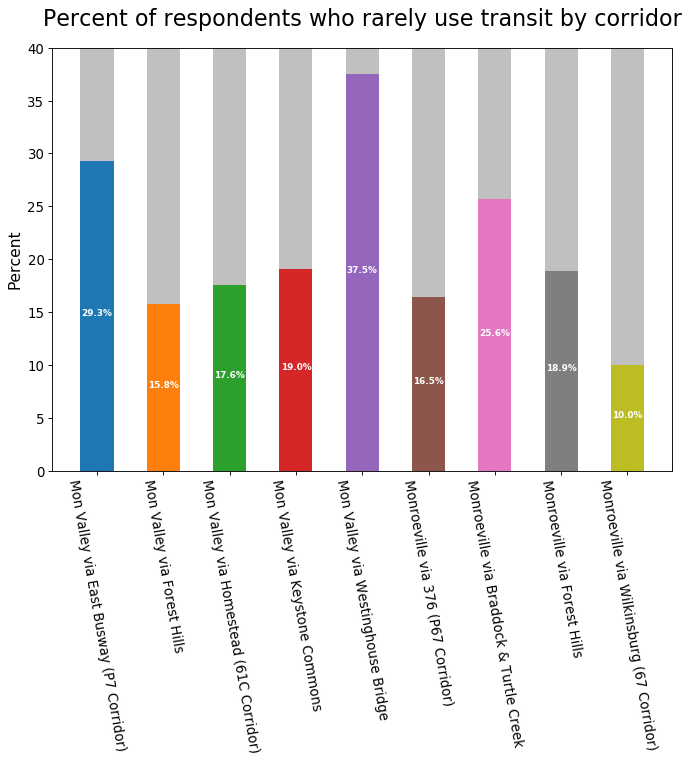

In [14]:
corr_freq = hp.demo_frequencies(data, 
                                id_index=id_ind, cat_index=cor_ind, val_index=transit_freq_ind, 
                                rm_other_cat=True)

hp.graph_freqs(corr_freq, val_name = "Current_Transit_Frequency",
                      val_inst = "Rarely, maybe a couple times a year",
                      cat_name = "Corridor_preference",
                      share_name="Share",
                      title = "Percent of respondents who rarely use transit by corridor", 
                      upper_lim=40)

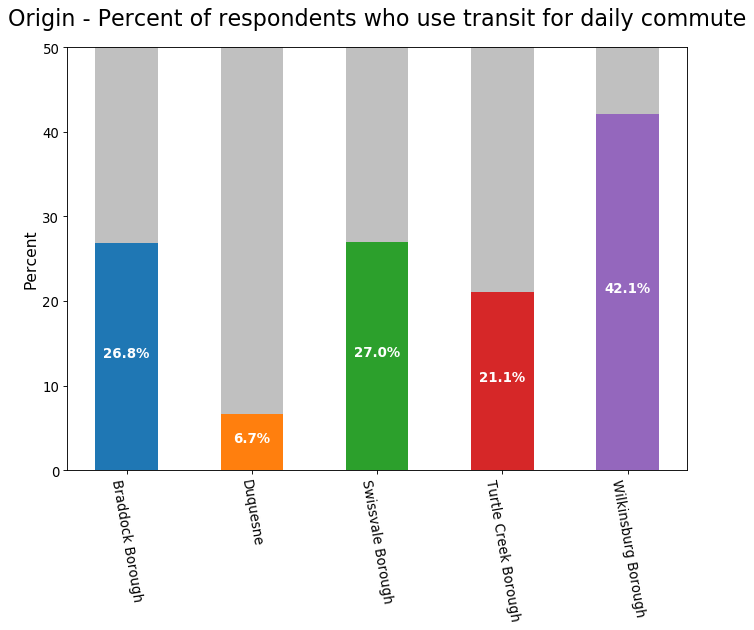

In [24]:
# Category: Origin
# Value: Transit Frequency, Daily Commute
origin_usage = hp.demo_frequencies(hp.aggregate_other(data, col_inds=[origin_ind]), 
                                id_index=id_ind, cat_name = "Where_From_o", val_index=transit_freq_ind, 
                                rm_other_cat=True)

hp.graph_freqs(origin_usage, val_name = "Current_Transit_Frequency",
                      val_inst = "Daily commute",
                      cat_name = "Where_From_o",
                      share_name="Share",
                      title = "Origin - Percent of respondents who use transit for daily commute", 
                      upper_lim=50)

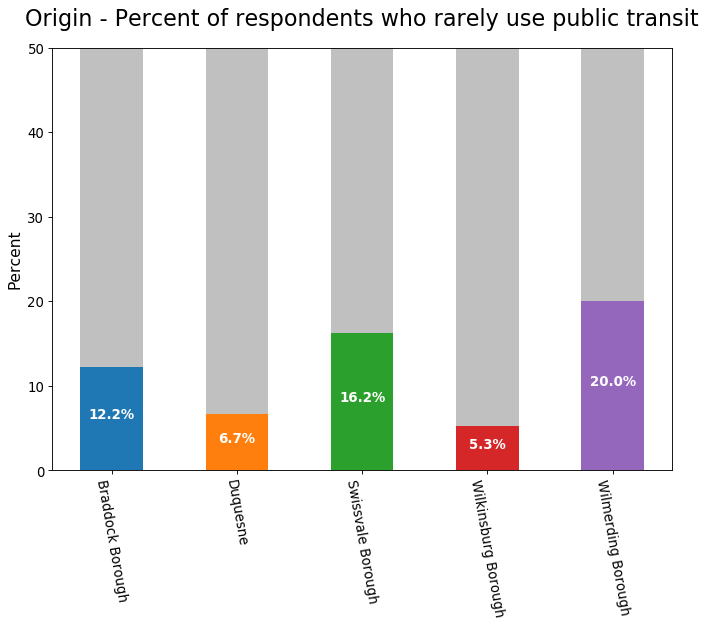

In [34]:
# Category: Origin
# Value: Transit Frequency, Daily Commute
origin_usage = hp.demo_frequencies(hp.aggregate_other(data, col_inds=[origin_ind], threshold=.051), 
                                id_index=id_ind, cat_name = "Where_From_o", val_index=transit_freq_ind, 
                                rm_other_cat=True)

hp.graph_freqs(origin_usage, val_name = "Current_Transit_Frequency",
                      val_inst = "Rarely, maybe a couple times a year",
                      cat_name = "Where_From_o",
                      share_name="Share",
                      title = "Origin - Percent of respondents who rarely use public transit", 
                      upper_lim=50)